<font size = 8 color ='336EFF'>kNN</font>

### Import Relevant Libraries

In [24]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### Import Iris dataset

In [25]:
# To import sklearn
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

Separate in data(X) and target(y)

In [41]:
X = iris.data[:, :3]# Select 1, 2, or 3 features
y = iris.target
N = y.shape
np.random.seed(42)
idx = np.random.permutation(N[0])
X = X[idx, :]
y = y[idx]
print(f'Number of values: {N}')

Number of values: (150,)


Split data in train(first 60000) and test(the rest)

In [42]:
X_train, X_test, y_train, y_test = X[:100], X[100:], y[:100], y[100:]

Train a kNN classifier

Set parameters weights='distance' and n_neighbors=4

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train) #guarda todos los datos en memoria

KNeighborsClassifier(n_neighbors=4, weights='distance')

Predict the test dataset and print the confusion matrix

In [44]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn_clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[13  0  0]
 [ 0 17  1]
 [ 0  1 18]]


Plot the confusion matrix

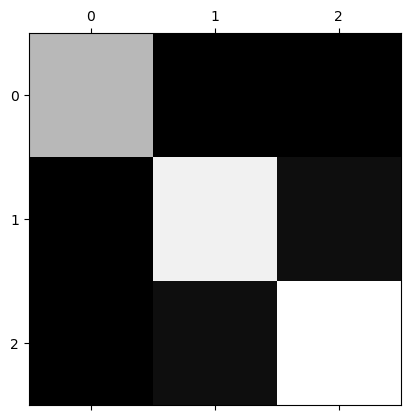

In [45]:
plt.matshow(cm, cmap=plt.cm.gray)
plt.savefig("confusion_matrix_plot")
plt.show()

Print the the accuracy score, precision score, recall score, f1 score(for the last three use parameter average=None)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy Score')
print(accuracy_score(y_test, y_test_pred) )
print('Precision Score')
print(precision_score(y_test, y_test_pred, average=None) )
print('Recall Score')
print(recall_score(y_test, y_test_pred, average=None) )
print('F1 Score')
print( f1_score(y_test, y_test_pred, average=None) )


Accuracy Score
0.96
Precision Score
[1.         0.94444444 0.94736842]
Recall Score
[1.         0.94444444 0.94736842]
F1 Score
[1.         0.94444444 0.94736842]


In [52]:
#Testing accuracy vs Value of K for KNN
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
valueK = []
for i in range(1,20):
    knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=i)
    knn_clf.fit(X_train, y_train) #guarda todos los datos en memoria
    y_test_pred = knn_clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_test_pred))
    valueK.append(i)

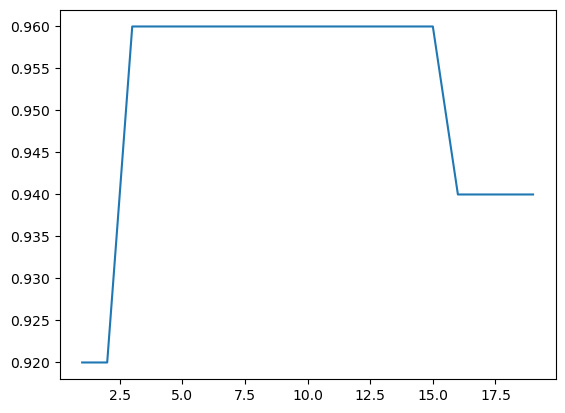

In [56]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

plt.plot(valueK, accuracy)
plt.show()

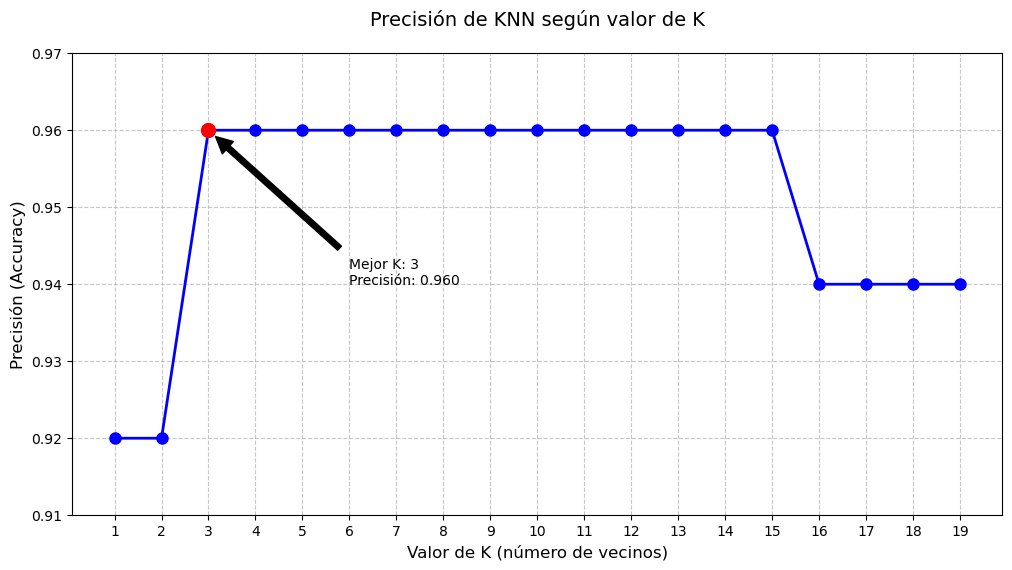

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(valueK, accuracy, 'bo-', linewidth=2, markersize=8)
plt.title('Precisión de KNN según valor de K', fontsize=14, pad=20)
plt.xlabel('Valor de K (número de vecinos)', fontsize=12)
plt.ylabel('Precisión (Accuracy)', fontsize=12)
plt.xticks(np.arange(1, 20, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(min(accuracy)-0.01, max(accuracy)+0.01)  # Ajustar los límites

# Marcar el mejor K
best_k = valueK[np.argmax(accuracy)]
best_acc = max(accuracy)
plt.scatter(best_k, best_acc, color='red', s=100, zorder=5)
plt.annotate(f'Mejor K: {best_k}\nPrecisión: {best_acc:.3f}', 
             xy=(best_k, best_acc), 
             xytext=(best_k+3, best_acc-0.02),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()